## 프랑스 도시의 부동산 거래와 영향 변수 시계열

In [1]:
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
path =pathlib.Path('/Users/leejieun/kaggle-notebooks/datasets/benoitfavier/immobilier-france/')
#/Users/leejieun/kaggle-notebooks/datasets/benoitfavier/immobilier-france/foyers_fiscaux.csv

In [8]:
households = pd.read_csv(path / "foyers_fiscaux.csv")
# n_households = households.groupby("date").sum()["n_foyers_fiscaux"]

/var/folders/hq/74v3821x34s_q34x5bq8cnh00000gn/T/ipykernel_27750/3722388695.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  households = pd.read_csv(path / "foyers_fiscaux.csv")


In [9]:
rates = pd.read_csv(path / "taux_interet.csv")
rates["date"] = pd.to_datetime(rates["date"])
rates = rates[rates["date"] > np.datetime64("2014-01-01")]

In [10]:
arrays = dict(np.load(path / "transactions.npz"))
data = {k: [s.decode("utf-8") for s in v.tobytes().split(b"\x00")] if v.dtype == np.uint8 else v for k, v in arrays.items()}
transactions = pd.DataFrame.from_dict(data)

In [11]:
appartment, house = (transactions[transactions["type_batiment"] == housing_type].set_index("date_transaction") for housing_type in ["Appartement", "Maison"])

In [12]:
appartment["date"] = appartment.index.to_numpy().astype('datetime64[M]')
appartment["m2_price"] = (appartment.prix / appartment.surface_habitable)
appartment = appartment[~appartment.m2_price.isna()]
app_prices = appartment.reset_index(drop=True)[["date", "m2_price"]].groupby("date").mean()

In [13]:
app_prices

,m2_price
date,
2014-01-01,3566.295712
2014-02-01,3437.936604
2014-03-01,3561.474742
2014-04-01,3529.211527
2014-05-01,3426.633272
...,...
2023-02-01,4312.085785
2023-03-01,4510.640790
2023-04-01,4527.617060


In [14]:
house["date"] = house.index.to_numpy().astype('datetime64[M]')
house["m2_price"] = (house.prix / house.surface_habitable)
house = house[~house.m2_price.isna()]
house_prices = house.reset_index(drop=True)[["date", "m2_price"]].groupby("date").mean()

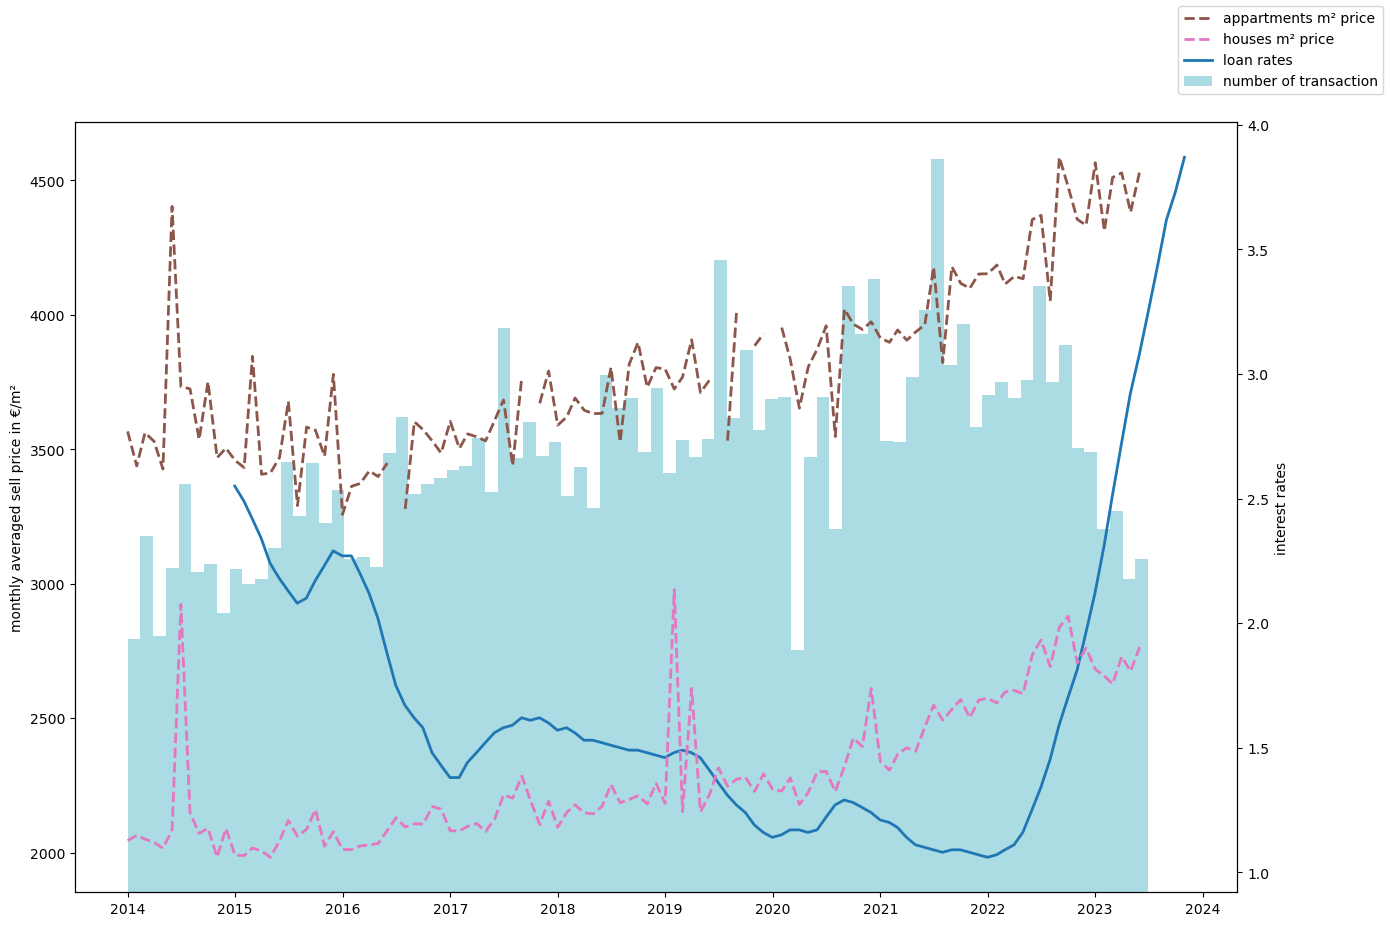

In [15]:
rate_dates = mdates.date2num(rates["date"])
transaction_dates = mdates.date2num(transactions["date_transaction"])
f, ax1 = plt.subplots(figsize=[15, 10])
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax3.hist(transaction_dates, bins=80, color="#abdbe3", label="number of transaction")
for label, column in [("loan rates", "taux")]:
    ax2.plot(rate_dates, rates[column], lw=2., label=label)
ax1.plot(mdates.date2num(app_prices.index), app_prices.m2_price, label="appartments m² price", linestyle="--", lw=2., color="C5")
ax1.plot(mdates.date2num(house_prices.index), house_prices.m2_price, label="houses m² price", linestyle="--", lw=2., color="C6")
ax3.xaxis.set_major_locator(mdates.YearLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax3.set_yticks([])
ax2.set_ylabel("interest rates")
ax1.set_ylabel("monthly averaged sell price in €/m²")
ax3.spines.right.set_position(("axes", 1.))
ax2.set_zorder(ax3.get_zorder()+1)
ax1.set_zorder(max(ax2.get_zorder(), ax3.get_zorder())+1)
ax1.set_frame_on(False)
_ = f.legend()